# Introduction

# Data Import

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import statsmodels.api as sm
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
from geopy.distance import vincenty
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load listings data
Boston_listings0 = pd.read_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Airbnb/data/Boston/Boston_listings.csv')
Boston_listings0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Columns: 106 entries, id to reviews_per_month
dtypes: float64(25), int64(21), object(60)
memory usage: 5.0+ MB


In [3]:
# check column names
list(Boston_listings0.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [4]:
# identify id and url features
id_url_cols = ['id',             
               'scrape_id',
               'host_id',
               'listing_url',
               'thumbnail_url',
               'medium_url',               
               'picture_url',
               'xl_picture_url',
               'host_url',
               'host_thumbnail_url',
               'host_picture_url',
               'zipcode']
Boston_listings0[id_url_cols].head()

,id,scrape_id,host_id,listing_url,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_thumbnail_url,host_picture_url,zipcode
0,3781,20190209175027,4804,https://www.airbnb.com/rooms/3781,NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,https://www.airbnb.com/users/show/4804,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,02128
1,5506,20190209175027,8229,https://www.airbnb.com/rooms/5506,NaN,NaN,https://a0.muscache.com/im/pictures/1598e8b6-5...,NaN,https://www.airbnb.com/users/show/8229,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,02119
2,6695,20190209175027,8229,https://www.airbnb.com/rooms/6695,NaN,NaN,https://a0.muscache.com/im/pictures/38ac4797-e...,NaN,https://www.airbnb.com/users/show/8229,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,02119
3,6976,20190209175027,16701,https://www.airbnb.com/rooms/6976,NaN,NaN,https://a0.muscache.com/im/pictures/85bf0653-b...,NaN,https://www.airbnb.com/users/show/16701,https://a0.muscache.com/im/pictures/d9075ba6-7...,https://a0.muscache.com/im/pictures/d9075ba6-7...,02131
4,8789,20190209175027,26988,https://www.airbnb.com/rooms/8789,NaN,NaN,https://a0.muscache.com/im/pictures/32210/7fdd...,NaN,https://www.airbnb.com/users/show/26988,https://a0.muscache.com/im/pictures/user/d7d71...,https://a0.muscache.com/im/pictures/user/d7d71...,02108


In [5]:
# identify datetime features
datetime_cols = ['last_scraped',                 
                 'calendar_last_scraped',
                 'host_since',
                 'first_review',
                 'last_review']
Boston_listings0[datetime_cols].head()

,last_scraped,calendar_last_scraped,host_since,first_review,last_review
0,2019-02-09,2019-02-09,2008-12-03,2015-07-10,2018-07-02
1,2019-02-09,2019-02-09,2009-02-19,2009-03-21,2018-11-18
2,2019-02-09,2019-02-09,2009-02-19,2009-08-06,2018-11-25
3,2019-02-09,2019-02-09,2009-05-11,2009-07-19,2018-10-23
4,2019-02-09,2019-02-09,2009-07-22,2014-08-12,2018-12-20


In [6]:
# identify textual features
textual_cols = ['name',
                'summary',
                'space',
                'description',
                'experiences_offered',
                'neighborhood_overview',
                'notes',
                'transit',
                'access',
                'interaction',
                'house_rules',
                'host_name',
                'host_location',
                'host_about',
                'host_response_time',
                'host_neighbourhood',
                'host_verifications',
                'street',
                'neighbourhood',
                'neighbourhood_cleansed',
                'neighbourhood_group_cleansed',
                'city',
                'state',
                'market',
                'smart_location',
                'country_code',
                'country',
                'property_type',
                'room_type',
                'bed_type',
                'amenities',
                'calendar_updated', 
                'cancellation_policy']
Boston_listings0[textual_cols].head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,...,market,smart_location,country_code,country,property_type,room_type,bed_type,amenities,calendar_updated,cancellation_policy
0,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,...,Boston,"Boston, MA",US,United States,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",4 months ago,super_strict_30
1,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",...,Boston,"Boston, MA",US,United States,Guest suite,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",today,strict_14_with_grace_period
2,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",Check out some of the other accommodations we ...,"We are a 5 minute walk to the subway, 5 minut...","Full Private apartment. 1 bedroom, kitchen, ...",NaN,...,Boston,"Boston, MA",US,United States,Condominium,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",today,strict_14_with_grace_period
3,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,"There is no smoking allowed, inside the apartm...","PUBLIC TRANSPORTATION: From the house, quick p...","You can have access to your room, the adjacent...",ABOUT ME: I am one of the original Boston AIRB...,...,Boston,"Boston, MA",US,United States,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",today,moderate
4,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,Guests should expect to show government ID to ...,The MBTA site is a great reference for public ...,Guests have access to the full unit,I'm available for questions and/or issues.,...,Boston,"Boston, MA",US,United States,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",yesterday,strict_14_with_grace_period


In [7]:
# identify numeric features
numeric_cols = ['host_acceptance_rate',
                'host_listings_count',
                'host_total_listings_count',
                'neighbourhood_group_cleansed',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'square_feet',
                'guests_included',
                'minimum_nights',
                'maximum_nights',
                'minimum_minimum_nights',
                'maximum_minimum_nights',
                'minimum_maximum_nights',
                'maximum_maximum_nights',
                'minimum_nights_avg_ntm',
                'maximum_nights_avg_ntm',
                'availability_30',
                'availability_60',
                'availability_90',
                'availability_365',
                'number_of_reviews',
                'number_of_reviews_ltm',
                'review_scores_rating',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value',
                'license',
                'jurisdiction_names',
                'reviews_per_month',
                'calculated_host_listings_count',
                'calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms']
Boston_listings0[numeric_cols].head()

,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,...,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,reviews_per_month,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,NaN,4.0,4.0,NaN,2,1.0,1.0,1.0,NaN,2,...,10.0,10.0,10.0,NaN,NaN,0.32,1,1,0,0
1,NaN,6.0,6.0,NaN,2,1.0,1.0,1.0,225.0,1,...,10.0,9.0,10.0,NaN,NaN,0.66,6,6,0,0
2,NaN,6.0,6.0,NaN,4,1.0,1.0,2.0,NaN,2,...,10.0,9.0,9.0,NaN,NaN,0.73,6,6,0,0
3,NaN,1.0,1.0,NaN,2,1.0,1.0,1.0,NaN,1,...,10.0,9.0,10.0,NaN,NaN,0.64,1,0,1,0
4,NaN,11.0,11.0,NaN,2,1.0,1.0,1.0,NaN,1,...,10.0,10.0,9.0,NaN,NaN,0.40,10,10,0,0


# Data Wrangling

## Missing Values

In [8]:
# check missing values
missing_data = Boston_listings0.isnull().sum(axis = 0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['missing%'] = missing_data['missing values'] / Boston_listings0.shape[0] * 100
missing_data_srt = missing_data.sort_values('missing%', ascending = False).reset_index(drop = True)
missing_data_srt[missing_data_srt['missing%'] > 0]

,variable,missing values,missing%
0,host_acceptance_rate,6155,100.000000
1,thumbnail_url,6155,100.000000
2,neighbourhood_group_cleansed,6155,100.000000
3,jurisdiction_names,6155,100.000000
4,license,6155,100.000000
5,xl_picture_url,6155,100.000000
6,medium_url,6155,100.000000
7,square_feet,6057,98.407799
8,weekly_price,5628,91.437855
9,monthly_price,5626,91.405361


* **Features with missing% > 90%**:  

  + host_acceptance_rate
  
  + thumbnail_url

  + neighbourhood_group_cleansed
 
  + jurisdiction_names
  
  + xl_picture_url
  
  + thumbnail_url

  + medium_url
 
  + square_feet
  
  + weekly_price
 
  + monthly_price	
  

## Feature Engineering 

### Convert string monetary values to numeric monetary values

In [9]:
# identify monetary features
monetary_cols = ['price', 
                 'weekly_price', 
                 'monthly_price', 
                 'security_deposit', 
                 'cleaning_fee', 
                 'extra_people']
Boston_listings0[monetary_cols].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,$125.00,$750.00,"$2,250.00",$0.00,$75.00,$0.00
1,$145.00,$980.00,"$3,000.00",$0.00,$40.00,$0.00
2,$169.00,NaN,NaN,NaN,$70.00,$8.00
3,$65.00,$395.00,"$1,350.00",$0.00,$0.00,$30.00
4,$99.00,"$1,200.00","$2,900.00","$1,000.00",$250.00,$0.00


In [10]:
# define strPrice_to_numPrice function
def strPrice_to_numPrice(price_string):
    '''
    Converts USD prices from string to numeric format
    
    Args:
        price_string (string): USD price in string format (e.g., '$123,456.00')
    
    Returns:
        price_numeric (float): USD price in numeric format (e.g., 123456.00)
    '''
    
    price_numeric = float(str(price_string).replace(',', '').split('$')[-1])
    return price_numeric

In [11]:
# apply strPrice_to_numPrice function over monetary features
Boston_listings1 = Boston_listings0.copy()
for col in monetary_cols:
    Boston_listings1[col] = Boston_listings1[col].apply(strPrice_to_numPrice)
Boston_listings1[monetary_cols].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,125.0,750.0,2250.0,0.0,75.0,0.0
1,145.0,980.0,3000.0,0.0,40.0,0.0
2,169.0,NaN,NaN,NaN,70.0,8.0
3,65.0,395.0,1350.0,0.0,0.0,30.0
4,99.0,1200.0,2900.0,1000.0,250.0,0.0


### Convert string boolean values to numeric boolean values

In [12]:
# identify boolean features
boolean_cols = ['host_is_superhost', 
                'host_has_profile_pic',
                'host_identity_verified',
                'is_location_exact',
                'has_availability',
                'requires_license',
                'instant_bookable',
                'is_business_travel_ready',
                'require_guest_profile_picture',
                'require_guest_phone_verification']
Boston_listings1[boolean_cols].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,t,t,f,t,t,f,f,f,f,f
1,t,t,t,t,t,f,t,f,f,f
2,t,t,t,t,t,f,t,f,f,f
3,t,t,t,t,t,f,f,f,t,f
4,f,t,f,t,t,f,f,f,f,f


In [13]:
# define strBoolean_to_numBoolean function
def strBoolean_to_numBoolean(s):
    '''
    Converts "first letter boolean" strings to integers
    
    Args:
        bool_string (string): 't', 'f' or other
    
    Returns:
        bool_number (int): 1, 0 or None
    '''
        
    if s == 'f':
        return 0
    elif s == 't':
        return 1
    return None

In [14]:
# apply strBoolean_to_numBoolean function over boolean features
Boston_listings2 = Boston_listings1.copy()
for col in boolean_cols:
    Boston_listings2[col] = Boston_listings2[col].apply(strBoolean_to_numBoolean)
Boston_listings2[boolean_cols].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,1.0,1.0,0.0,1,1,0,0,0,0,0
1,1.0,1.0,1.0,1,1,0,1,0,0,0
2,1.0,1.0,1.0,1,1,0,1,0,0,0
3,1.0,1.0,1.0,1,1,0,0,0,1,0
4,0.0,1.0,0.0,1,1,0,0,0,0,0


### Create distance_to_center feature

In [15]:
# sepecify coordinates of Boston
Boston_listings3 = Boston_listings2.copy()
Boston_listings3['lat_center'] = 42.3584300
Boston_listings3['lon_center'] = -71.0597700

In [16]:
# calculates vincenty distance
Boston_listings3['distance_to_center'] = Boston_listings3.apply(lambda x: vincenty((x['latitude'], x['longitude']), (x['lat_center'], x['lon_center'])).km, axis = 1)
Boston_listings3['distance_to_center'].head()

0    2.616808
1    4.338483
2    4.212168
3    9.642258
4    0.251808
Name: distance_to_center, dtype: float64

In [17]:
Boston_listings3.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,lat_center,lon_center,distance_to_center
0,3781,https://www.airbnb.com/rooms/3781,20190209175027,2019-02-09,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,0,0,1,1,0,0,0.32,42.35843,-71.05977,2.616808
1,5506,https://www.airbnb.com/rooms/5506,20190209175027,2019-02-09,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,0,0,6,6,0,0,0.66,42.35843,-71.05977,4.338483
2,6695,https://www.airbnb.com/rooms/6695,20190209175027,2019-02-09,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,0,0,6,6,0,0,0.73,42.35843,-71.05977,4.212168
3,6976,https://www.airbnb.com/rooms/6976,20190209175027,2019-02-09,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,1,0,1,0,1,0,0.64,42.35843,-71.05977,9.642258
4,8789,https://www.airbnb.com/rooms/8789,20190209175027,2019-02-09,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,0,0,10,10,0,0,0.40,42.35843,-71.05977,0.251808


### Create amenities features

In [18]:
# create amenities features
Boston_listings3['is_Wifi'] = Boston_listings3['amenities'].apply(lambda s: int('wifi' in str(s.lower())[1:].split(',')))
Boston_listings3['is_TV'] = Boston_listings3['amenities'].apply(lambda s: int('tv' in str(s.lower())[1:].split(',')))
Boston_listings3['is_Washer_Dryer'] = Boston_listings3['amenities'].apply(lambda s: int('dryer' in str(s.lower())[1:].split(',')))
Boston_listings3['is_Kitchen'] = Boston_listings3['amenities'].apply(lambda s: int('kitchen' in str(s.lower())[1:].split(',')))
Boston_listings3[['is_Wifi', 'is_TV', 'is_Washer_Dryer', 'is_Kitchen']].head()

,is_Wifi,is_TV,is_Washer_Dryer,is_Kitchen
0,1,1,1,1
1,1,1,1,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


### Encode categorical features

In [19]:
# encode categorical features
catDF = pd.get_dummies(Boston_listings3[['neighbourhood_cleansed', 'room_type']])
Boston_listings4 = pd.concat([Boston_listings3, catDF], axis = 1)
Boston_listings4.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,3781,https://www.airbnb.com/rooms/3781,20190209175027,2019-02-09,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,0,0,0,0,0,0,0,1,0,0
1,5506,https://www.airbnb.com/rooms/5506,20190209175027,2019-02-09,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,0,1,0,0,0,0,0,1,0,0
2,6695,https://www.airbnb.com/rooms/6695,20190209175027,2019-02-09,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,0,1,0,0,0,0,0,1,0,0
3,6976,https://www.airbnb.com/rooms/6976,20190209175027,2019-02-09,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,1,0,0,0,0,0,0,0,1,0
4,8789,https://www.airbnb.com/rooms/8789,20190209175027,2019-02-09,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# check column names
list(Boston_listings4.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


# Exploratory Data Analysis

## Numeric Variables

Uninformative numeric features to drop:  

* host_acceptance_rate
  
* square_feet
  
* weekly_price
 
* monthly_price
  
* minimum_minimum_nights
  
* maximum_maximum_nights
  
* maximum_minimum_nights
  
* minimum_maximum_nights
 
* minimum_nights_avg_ntm
  
* maximum_nights_avg_ntm
  
* host_total_listings_count
  
* calculated_host_listings_count_entire_homes
 
* calculated_host_listings_count_private_rooms
  
* calculated_host_listings_count_shared_rooms 
  

In [21]:
# create a list of numeric variables
numVar = ['price', 
          'security_deposit', 
          'cleaning_fee', 
          'extra_people',
          'distance_to_center',
          'accommodates',
          'bathrooms',
          'bedrooms',
          'beds',
          'guests_included',
          'minimum_nights',
          'maximum_nights',
          'availability_30',
          'availability_60',
          'availability_90',
          'availability_365',
          'number_of_reviews',
          'number_of_reviews_ltm',        
          'reviews_per_month',
          'review_scores_rating',
          'review_scores_accuracy',
          'review_scores_cleanliness',
          'review_scores_checkin',
          'review_scores_communication',
          'review_scores_location',
          'review_scores_value',
          'host_listings_count']

In [22]:
# check correlations
corrmat = Boston_listings4[numVar].corr()
figure = ff.create_annotated_heatmap(
         z=corrmat.values,
         x=list(corrmat.columns),
         y=list(corrmat.index),
         annotation_text=corrmat.round(2).values,
         showscale=True)
iplot(figure)

Based on correlations, the below features should be droped from further analysis:

* availability_30

* availability_60

* availability_90

* number_of_reviews

* number_of_reviews_ltm

* review_scores_accuracy
          
* review_scores_cleanliness

* review_scores_checkin

* review_scores_communication

* review_scores_location

* review_scores_value

In [23]:
# create a list of numeric variables to keep
numVar_to_keep = ['price', 
                  'security_deposit', 
                  'cleaning_fee', 
                  'extra_people',
                  'distance_to_center',
                  'accommodates',
                  'bathrooms',
                  'bedrooms',
                  'beds',
                  'guests_included',
                  'minimum_nights',
                  'maximum_nights',
                  'availability_365',
                  'reviews_per_month',
                  'review_scores_rating',
                  'host_listings_count']

## Categorical Variables

Uninformative categorical features to drop:  

* host_response_time
  
* cancellation_policy
  
* host_has_profile_pic
 
* host_identity_verified
  
* is_location_exact
  
* instant_bookable
  
* require_guest_profile_picture
  
* require_guest_phone_verification

In [24]:
# create a list of categorical variables
catVar = ['host_is_superhost', 
          'is_Wifi',
          'is_TV',
          'is_Washer_Dryer',
          'is_Kitchen',
          'neighbourhood_cleansed',
          'property_type',
          'room_type',
          'bed_type']

In [25]:
# check categorical features
for col in catVar:
    print("\n")
    print(col)
    print(Boston_listings4[col].value_counts())



host_is_superhost
0.0    4721
1.0    1432
Name: host_is_superhost, dtype: int64


is_Wifi
1    6012
0     143
Name: is_Wifi, dtype: int64


is_TV
1    4796
0    1359
Name: is_TV, dtype: int64


is_Washer_Dryer
1    4403
0    1752
Name: is_Washer_Dryer, dtype: int64


is_Kitchen
1    5634
0     521
Name: is_Kitchen, dtype: int64


neighbourhood_cleansed
Dorchester                 537
Jamaica Plain              514
Back Bay                   494
Downtown                   453
South End                  445
Fenway                     440
Brighton                   358
South Boston               338
Allston                    329
Roxbury                    319
East Boston                311
Beacon Hill                255
North End                  245
Mission Hill               214
Charlestown                156
West End                   154
Chinatown                  139
Roslindale                 117
South Boston Waterfront     76
Mattapan                    75
West Roxbury           

The below level to avoid collinearity:

* neighbourhood_cleansed_Leather District

* room_type_Shared room

In [26]:
# create a list of categorical variables to keep
catVar_to_keep = ['host_is_superhost', 
                  'is_Wifi',
                  'is_TV',
                  'is_Washer_Dryer',
                  'is_Kitchen',
                  'neighbourhood_cleansed_Allston',
                  'neighbourhood_cleansed_Back Bay',
                  'neighbourhood_cleansed_Bay Village',
                  'neighbourhood_cleansed_Beacon Hill',
                  'neighbourhood_cleansed_Brighton',
                  'neighbourhood_cleansed_Charlestown',
                  'neighbourhood_cleansed_Chinatown',
                  'neighbourhood_cleansed_Dorchester',
                  'neighbourhood_cleansed_Downtown',
                  'neighbourhood_cleansed_East Boston',
                  'neighbourhood_cleansed_Fenway',
                  'neighbourhood_cleansed_Hyde Park',
                  'neighbourhood_cleansed_Jamaica Plain',
                  'neighbourhood_cleansed_Longwood Medical Area',
                  'neighbourhood_cleansed_Mattapan',
                  'neighbourhood_cleansed_Mission Hill',
                  'neighbourhood_cleansed_North End',
                  'neighbourhood_cleansed_Roslindale',
                  'neighbourhood_cleansed_Roxbury',
                  'neighbourhood_cleansed_South Boston',
                  'neighbourhood_cleansed_South Boston Waterfront',
                  'neighbourhood_cleansed_South End',
                  'neighbourhood_cleansed_West End',
                  'neighbourhood_cleansed_West Roxbury',
                  'room_type_Entire home/apt',
                  'room_type_Private room']

## Descriptive Statistics

In [27]:
# keep relevant features
var_to_keep = numVar_to_keep + catVar_to_keep
Boston_listings5 = Boston_listings4[var_to_keep]
Boston_listings5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 47 columns):
price                                             6155 non-null float64
security_deposit                                  4280 non-null float64
cleaning_fee                                      5176 non-null float64
extra_people                                      6155 non-null float64
distance_to_center                                6155 non-null float64
accommodates                                      6155 non-null int64
bathrooms                                         6150 non-null float64
bedrooms                                          6149 non-null float64
beds                                              6152 non-null float64
guests_included                                   6155 non-null int64
minimum_nights                                    6155 non-null int64
maximum_nights                                    6155 non-null int64
availability_365                     

In [28]:
# describe numeric variables
Boston_listings5.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6155.0,206.795126,3.754239e+02,0.000000,83.000000,150.000000,220.00000,5.000000e+03
security_deposit,4280.0,196.570561,3.179056e+02,0.000000,0.000000,100.000000,300.00000,5.000000e+03
cleaning_fee,5176.0,73.192427,4.881477e+01,0.000000,35.000000,70.000000,100.00000,4.950000e+02
extra_people,6155.0,11.451990,2.033980e+01,0.000000,0.000000,0.000000,20.00000,3.000000e+02
distance_to_center,6155.0,3.958259,2.839366e+00,0.086062,1.737084,3.189664,5.86236,1.488431e+01
accommodates,6155.0,3.407311,2.175956e+00,1.000000,2.000000,3.000000,4.00000,1.600000e+01
bathrooms,6150.0,1.268049,5.111175e-01,0.000000,1.000000,1.000000,1.50000,6.000000e+00
bedrooms,6149.0,1.351114,9.266306e-01,0.000000,1.000000,1.000000,2.00000,8.000000e+00
beds,6152.0,1.844603,1.355363e+00,1.000000,1.000000,1.000000,2.00000,1.900000e+01
guests_included,6155.0,1.708855,1.388253e+00,1.000000,1.000000,1.000000,2.00000,1.600000e+01


In [29]:
# check correlations
Boston_listings5.corr()

,price,security_deposit,cleaning_fee,extra_people,distance_to_center,accommodates,bathrooms,bedrooms,beds,guests_included,...,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,room_type_Entire home/apt,room_type_Private room
price,1.000000,0.116430,0.309341,-0.058643,-0.147383,0.411253,0.249534,0.317260,0.451371,0.174148,...,0.009418,-0.045500,0.035985,0.036378,0.024575,0.000990,0.044845,-0.028488,0.240892,-0.233392
security_deposit,0.116430,1.000000,0.346769,0.092765,-0.064016,0.126627,0.103985,0.158331,0.145646,0.183791,...,0.023069,-0.030119,0.004308,0.001031,0.013127,0.002548,-0.064234,-0.026516,0.165929,-0.162857
cleaning_fee,0.309341,0.346769,1.000000,-0.033796,-0.300806,0.504334,0.292817,0.442135,0.443389,0.337736,...,0.052862,-0.088848,-0.112644,0.054286,0.058909,0.033796,0.070406,-0.051160,0.574091,-0.556970
extra_people,-0.058643,0.092765,-0.033796,1.000000,0.037378,0.057639,0.013646,0.053696,0.054884,0.261847,...,0.023465,0.002405,0.022155,0.005794,0.015889,0.016313,-0.053377,-0.005623,-0.094614,0.089281
distance_to_center,-0.147383,-0.064016,-0.300806,0.037378,1.000000,-0.081559,0.041216,0.060127,-0.006350,-0.032982,...,-0.220094,0.311010,0.029792,-0.094212,-0.091706,-0.177672,-0.172555,0.300820,-0.393603,0.391626
accommodates,0.411253,0.126627,0.504334,0.057639,-0.081559,1.000000,0.438084,0.760308,0.864856,0.501397,...,0.074942,-0.026059,-0.024904,0.093524,-0.019579,-0.041304,0.020689,-0.013741,0.473675,-0.458396
bathrooms,0.249534,0.103985,0.292817,0.013646,0.041216,0.438084,1.000000,0.498554,0.456807,0.205527,...,-0.049896,-0.017145,0.067418,0.069661,-0.016910,-0.063062,0.047282,0.005208,0.043499,-0.048707
bedrooms,0.317260,0.158331,0.442135,0.053696,0.060127,0.760308,0.498554,1.000000,0.729229,0.427900,...,0.042156,-0.003957,0.007910,0.068788,-0.018563,-0.081675,0.016768,0.015589,0.247796,-0.240441
beds,0.451371,0.145646,0.443389,0.054884,-0.006350,0.864856,0.456807,0.729229,1.000000,0.431226,...,0.037459,-0.007744,0.004096,0.087125,-0.027352,-0.059329,0.010695,-0.001269,0.336899,-0.336928
guests_included,0.174148,0.183791,0.337736,0.261847,-0.032982,0.501397,0.205527,0.427900,0.431226,1.000000,...,0.013967,-0.022230,-0.047056,0.037200,-0.006224,-0.008334,-0.034593,-0.002892,0.261817,-0.252318


## Price Check

In [30]:
# plot a histogram of price
trace = go.Histogram(x=Boston_listings5['price'],
                     marker=dict(color="green"))

layout = go.Layout(xaxis=dict(title="Price"),
                   yaxis=dict(title="Num of Listings"),
                   title="Histogram of Price")
data = [trace]
figure = go.Figure(data=data,layout=layout)
iplot(figure)

In [31]:
# find percentiles for price
Boston_listings5['price'].quantile(np.linspace(0.025, 1, 39 ,0))

0.025     35.0
0.050     40.0
0.075     48.0
0.100     50.0
0.125     56.0
0.150     61.0
0.175     68.0
0.200     74.0
0.225     76.0
0.250     83.0
0.275     90.0
0.300     98.0
0.325    100.0
0.350    100.0
0.375    110.0
0.400    120.0
0.425    125.0
0.450    133.0
0.475    143.0
0.500    150.0
0.525    150.0
0.550    160.0
0.575    170.0
0.600    175.0
0.625    181.0
0.650    189.0
0.675    195.0
0.700    200.0
0.725    202.0
0.750    220.0
0.775    230.0
0.800    249.0
0.825    259.0
0.850    283.0
0.875    299.0
0.900    325.0
0.925    379.0
0.950    495.0
0.975    799.0
Name: price, dtype: float64

In [32]:
# check high-end rooms
Boston_listings4[['id', 'listing_url', 'name', 'price']][Boston_listings4['price'] >= 800].sort_values('price', ascending = False)

,id,listing_url,name,price
3452,21678120,https://www.airbnb.com/rooms/21678120,Stayloom’s Remastered Retreat | near Fenway,5000.0
2316,17138041,https://www.airbnb.com/rooms/17138041,Stayloom's Downtown Destination | near Back Bay,5000.0
5532,29682207,https://www.airbnb.com/rooms/29682207,Stayloom's Charming Upscale Duplex | near T,5000.0
2767,19160270,https://www.airbnb.com/rooms/19160270,Stayloom's Saltspray Luxury | Beachfront,5000.0
2754,19141729,https://www.airbnb.com/rooms/19141729,Stayloom’s Saltspray Escape | Beachfront,5000.0
2746,19115873,https://www.airbnb.com/rooms/19115873,"Stayloom’s Upscale Oasis | Private deck, near T",5000.0
3857,22794472,https://www.airbnb.com/rooms/22794472,Stayloom’s Bright Buttonwood House | near T,5000.0
3861,22814449,https://www.airbnb.com/rooms/22814449,Stayloom’s Charming Home | near T,5000.0
3862,22814686,https://www.airbnb.com/rooms/22814686,Stayloom’s Upscale Destination | near T,5000.0
5534,29682306,https://www.airbnb.com/rooms/29682306,Stayloom's Darling Luxury Apartment | near T,5000.0


In [33]:
# check low-end rooms
Boston_listings4[['id', 'listing_url', 'name', 'price']][Boston_listings4['price'] == 0].sort_values('price', ascending = False)

,id,listing_url,name,price
3041,20268369,https://www.airbnb.com/rooms/20268369,Large Private Bedroom Close to Airport,0.0
3054,20349970,https://www.airbnb.com/rooms/20349970,"Walk To The Beach or City, room 7",0.0
3303,21237147,https://www.airbnb.com/rooms/21237147,West Rutland Square 1 bedroom PERFECTION!,0.0


# Data Cleaning

## Exclude Extreme and Missing Values

In [34]:
# exclude extreme prices
Boston_listings6 = Boston_listings5[(Boston_listings5['price'] > 0) & (Boston_listings5['price'] < 800)]
Boston_listings6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 0 to 6154
Data columns (total 47 columns):
price                                             5999 non-null float64
security_deposit                                  4156 non-null float64
cleaning_fee                                      5031 non-null float64
extra_people                                      5999 non-null float64
distance_to_center                                5999 non-null float64
accommodates                                      5999 non-null int64
bathrooms                                         5994 non-null float64
bedrooms                                          5993 non-null float64
beds                                              5996 non-null float64
guests_included                                   5999 non-null int64
minimum_nights                                    5999 non-null int64
maximum_nights                                    5999 non-null int64
availability_365                     

In [35]:
# delete missing values
Boston_listings7= Boston_listings6.dropna()
Boston_listings7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3413 entries, 0 to 6095
Data columns (total 47 columns):
price                                             3413 non-null float64
security_deposit                                  3413 non-null float64
cleaning_fee                                      3413 non-null float64
extra_people                                      3413 non-null float64
distance_to_center                                3413 non-null float64
accommodates                                      3413 non-null int64
bathrooms                                         3413 non-null float64
bedrooms                                          3413 non-null float64
beds                                              3413 non-null float64
guests_included                                   3413 non-null int64
minimum_nights                                    3413 non-null int64
maximum_nights                                    3413 non-null int64
availability_365                     

In [36]:
# describe numeric variables
Boston_listings7.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3413.0,165.062701,107.388311,10.000000,85.000000,150.000000,200.000000,793.00000
security_deposit,3413.0,201.535013,299.529912,0.000000,0.000000,100.000000,300.000000,5000.00000
cleaning_fee,3413.0,70.922356,48.447971,0.000000,35.000000,69.000000,100.000000,495.00000
extra_people,3413.0,15.119836,21.490312,0.000000,0.000000,10.000000,25.000000,300.00000
distance_to_center,3413.0,3.956817,2.861771,0.086062,1.706904,3.096394,5.907249,14.83379
accommodates,3413.0,3.596543,2.237342,1.000000,2.000000,3.000000,4.000000,16.00000
bathrooms,3413.0,1.271462,0.515226,0.000000,1.000000,1.000000,1.500000,5.00000
bedrooms,3413.0,1.389979,0.942661,0.000000,1.000000,1.000000,2.000000,6.00000
beds,3413.0,1.915910,1.325959,1.000000,1.000000,1.000000,2.000000,16.00000
guests_included,3413.0,1.960738,1.499388,1.000000,1.000000,1.000000,2.000000,16.00000


In [37]:
# check correlations
Boston_listings7.corr()

,price,security_deposit,cleaning_fee,extra_people,distance_to_center,accommodates,bathrooms,bedrooms,beds,guests_included,...,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,room_type_Entire home/apt,room_type_Private room
price,1.000000,0.227691,0.571801,-0.007209,-0.342939,0.547580,0.296419,0.490828,0.482359,0.380389,...,0.029845,-0.103750,-0.120297,0.094722,0.105333,0.093380,0.027365,-0.059385,0.564166,-0.551766
security_deposit,0.227691,1.000000,0.372077,0.080142,-0.095633,0.134269,0.080709,0.147286,0.134515,0.223218,...,0.020070,-0.034987,-0.026211,0.017142,0.020134,-0.008121,-0.038861,-0.044102,0.211529,-0.207434
cleaning_fee,0.571801,0.372077,1.000000,0.009618,-0.280402,0.510398,0.259072,0.457788,0.459962,0.409919,...,0.075852,-0.082491,-0.124011,0.068576,0.055366,0.056364,0.020329,-0.048266,0.556475,-0.544543
extra_people,-0.007209,0.080142,0.009618,1.000000,0.023865,0.037884,0.015497,0.051020,0.047872,0.203225,...,-0.014377,-0.006450,-0.007052,0.017923,0.049054,0.034840,-0.045378,0.005698,-0.097293,0.091641
distance_to_center,-0.342939,-0.095633,-0.280402,0.023865,1.000000,-0.042117,0.096422,0.088359,0.021855,-0.028267,...,-0.245898,0.327815,0.026149,-0.098249,-0.078903,-0.178730,-0.130452,0.285543,-0.381882,0.381627
accommodates,0.547580,0.134269,0.510398,0.037884,-0.042117,1.000000,0.381834,0.798628,0.890447,0.571284,...,0.102101,-0.010420,-0.063738,0.097425,-0.002061,-0.026462,-0.009062,-0.008302,0.460952,-0.450115
bathrooms,0.296419,0.080709,0.259072,0.015497,0.096422,0.381834,1.000000,0.456618,0.394003,0.238965,...,-0.046140,-0.017031,0.056254,0.093064,-0.005487,-0.062002,-0.011005,0.043021,-0.027174,0.022725
bedrooms,0.490828,0.147286,0.457788,0.051020,0.088359,0.798628,0.456618,1.000000,0.778924,0.524670,...,0.068165,0.000678,-0.010733,0.088809,-0.010123,-0.055634,-0.026417,0.024224,0.270673,-0.266210
beds,0.482359,0.134515,0.459962,0.047872,0.021855,0.890447,0.394003,0.778924,1.000000,0.526386,...,0.062268,0.007696,-0.041048,0.111225,-0.014893,-0.040527,-0.020212,0.006549,0.358613,-0.351581
guests_included,0.380389,0.223218,0.409919,0.203225,-0.028267,0.571284,0.238965,0.524670,0.526386,1.000000,...,0.000606,-0.034525,-0.076873,0.031580,0.016928,-0.002155,-0.055985,-0.001122,0.326767,-0.319748


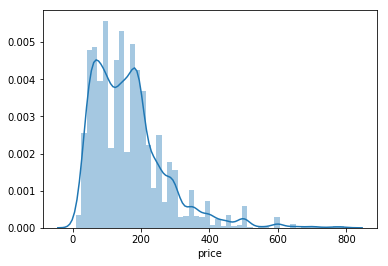

In [38]:
# check price distribution
sns.distplot(Boston_listings7['price'])
plt.show()

## Seperate Features and Targets

In [39]:
# create the target vector
y = Boston_listings7.iloc[:, Boston_listings7.columns == 'price']
y['price'].describe()

count    3413.000000
mean      165.062701
std       107.388311
min        10.000000
25%        85.000000
50%       150.000000
75%       200.000000
max       793.000000
Name: price, dtype: float64

In [40]:
# create the features matrix
X = Boston_listings7.iloc[:, Boston_listings7.columns != 'price']
X.describe().T

,count,mean,std,min,25%,50%,75%,max
security_deposit,3413.0,201.535013,299.529912,0.000000,0.000000,100.000000,300.000000,5000.00000
cleaning_fee,3413.0,70.922356,48.447971,0.000000,35.000000,69.000000,100.000000,495.00000
extra_people,3413.0,15.119836,21.490312,0.000000,0.000000,10.000000,25.000000,300.00000
distance_to_center,3413.0,3.956817,2.861771,0.086062,1.706904,3.096394,5.907249,14.83379
accommodates,3413.0,3.596543,2.237342,1.000000,2.000000,3.000000,4.000000,16.00000
bathrooms,3413.0,1.271462,0.515226,0.000000,1.000000,1.000000,1.500000,5.00000
bedrooms,3413.0,1.389979,0.942661,0.000000,1.000000,1.000000,2.000000,6.00000
beds,3413.0,1.915910,1.325959,1.000000,1.000000,1.000000,2.000000,16.00000
guests_included,3413.0,1.960738,1.499388,1.000000,1.000000,1.000000,2.000000,16.00000
minimum_nights,3413.0,3.953120,12.057459,1.000000,1.000000,2.000000,3.000000,300.00000


## Split Data into Training and Test Sets

In [41]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('Training Features Shape:', X_train.shape)
print('Training Lable Shape:', y_train.shape)
print('Test Features Shape:', X_test.shape)
print('Test Lable Shape:', y_test.shape)

Training Features Shape: (2559, 46)
Training Lable Shape: (2559, 1)
Test Features Shape: (854, 46)
Test Lable Shape: (854, 1)


In [42]:
# fit standardizer to training set
standardizer = StandardScaler()
standardizer.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
# apply to both training and test sets
X_trian_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

In [44]:
# covert labels to arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Machine Learning Model - Random Forests Regression

In [45]:
# create a base Random Forest model
base_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [46]:
# train the model on training data
base_rf.fit(X_trian_std , y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [47]:
# predict test data
y_pred_rf = base_rf.predict(X_test_std)

In [48]:
# caculate MSE, MAE, MAPE, and Accuracy
errors = abs(y_pred_rf - y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / y_test)), 2)
accuracy = 100 - mape
print('Mean Squared Error: ', round(mean_squared_error(y_test, y_pred_rf), 2))
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Accuracy: ', accuracy, "%")

Mean Squared Error:  3272.88
Mean Absolute Error:  35.03
Mean Absolute Percentage Error:  25.34
Accuracy:  74.66 %


In [49]:
# create a dataframe of feature importances
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = base_rf.feature_importances_
feature_importances_srt = feature_importances.sort_values(by='importance', ascending = False).reset_index()
feature_importances_srt

,index,feature,importance
0,44,room_type_Entire home/apt,0.313321
1,5,bathrooms,0.140879
2,3,distance_to_center,0.080340
3,1,cleaning_fee,0.070545
4,12,reviews_per_month,0.051715
5,11,availability_365,0.050008
6,6,bedrooms,0.034917
7,14,host_listings_count,0.030903
8,0,security_deposit,0.029078
9,4,accommodates,0.025735


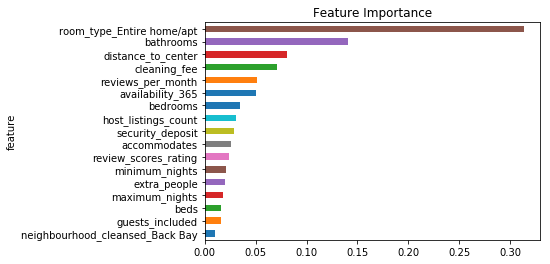

In [50]:
# plot Top 20 feature importances
feature_importances_top = feature_importances_srt[feature_importances_srt['importance'] > 0.01]
feature_importances_top.sort_values(by='importance', ascending = True, inplace = True)
feature_importances_top.plot(x = 'feature', y = 'importance', kind = 'barh', legend = False)
plt.title('Feature Importance')
plt.show()

# Machine Learning Model - Lasso Regression

In [51]:
# create a base Lasso Regression model
base_lasso = Lasso()

Text(0, 0.5, 'weights')

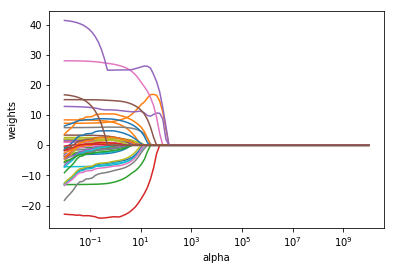

In [52]:
# examine effect Of alpha on Lasso Regression
alphas = 10**np.linspace(10,-2,100)*0.5
coefs = []
for a in alphas:
    base_lasso.set_params(alpha=a)
    base_lasso.fit(X_trian_std, y_train)
    coefs.append(base_lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [53]:
# examine effect Of alpha on coefficients
alphas = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 20, 30, 40, 50]
coef_df = pd.DataFrame()
coef_df['Feature'] = X.columns
mse = []
for a in alphas:
    base_lasso.set_params(alpha=a)
    base_lasso.fit(X_trian_std, y_train)
    column_name = 'Alpha=%f' % a
    coef_df[column_name] = base_lasso.coef_
    y_pred_lasso = base_lasso.predict(X_test_std)
    mse.append(mean_squared_error(y_test, y_pred_lasso))
    
coef_df

,Feature,Alpha=0.050000,Alpha=0.100000,Alpha=0.250000,Alpha=0.500000,Alpha=0.750000,Alpha=1.000000,Alpha=5.000000,Alpha=10.000000,Alpha=20.000000,Alpha=30.000000,Alpha=40.000000,Alpha=50.000000
0,security_deposit,1.893796,1.855061,1.754981,1.616495,1.483424,1.337681,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,cleaning_fee,7.351889,7.414996,7.667031,8.024325,8.375145,8.684955,13.360969,16.050216,16.814779,14.139205,9.984675,5.414896
2,extra_people,-0.703284,-0.641205,-0.448261,-0.075427,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
3,distance_to_center,-23.362767,-23.961306,-23.957231,-23.711480,-23.758122,-23.324737,-18.020549,-13.384091,-4.212205,-0.000000,-0.000000,-0.000000
4,accommodates,12.545131,12.185548,11.755045,11.654001,11.520958,11.398554,11.297020,9.690390,10.677889,10.603532,7.489413,2.055412
5,bathrooms,15.081858,15.049437,14.904889,14.752208,14.621445,14.483924,11.818901,8.035878,0.000000,0.000000,0.000000,0.000000
6,bedrooms,27.811453,27.622307,27.159292,26.760252,26.390854,26.083749,21.087972,17.515018,10.690933,2.884155,0.000000,0.000000
7,beds,-1.191522,-0.670819,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,guests_included,2.548386,2.491636,2.366762,2.199582,2.114953,2.057708,0.149364,0.000000,0.000000,0.000000,0.000000,0.000000
9,minimum_nights,-7.021400,-6.946158,-6.732596,-6.428354,-6.136300,-5.867242,-1.814599,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


In [54]:
# examine effect Of alpha on MSE
mse_df = pd.DataFrame({'Alpha':alphas,'MSE':mse})
mse_df

,Alpha,MSE
0,0.05,4347.015514
1,0.10,4341.496343
2,0.25,4333.837246
3,0.50,4328.126371
4,0.75,4328.351468
5,1.00,4333.697243
6,5.00,4597.911746
7,10.00,5061.931339
8,20.00,5985.072970
9,30.00,6999.034642


In [55]:
# fit model using the best parameters
base_lasso.set_params(alpha=0.5)
base_lasso.fit(X_trian_std, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
# predict test data
y_pred_lasso = base_lasso.predict(X_test_std)

In [57]:
# caculate MSE, MAE, MAPE, and Accuracy
errors = abs(y_pred_lasso - y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / y_test)), 2)
accuracy = 100 - mape
print('Mean Squared Error: ', round(mean_squared_error(y_test, y_pred_lasso), 2))
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Accuracy: ', accuracy, "%")

Mean Squared Error:  4328.13
Mean Absolute Error:  44.84
Mean Absolute Percentage Error:  34.88
Accuracy:  65.12 %


In [58]:
# print a dataframe of feature parameters
coef_df[['Feature', 'Alpha=0.500000']]

,Feature,Alpha=0.500000
0,security_deposit,1.616495
1,cleaning_fee,8.024325
2,extra_people,-0.075427
3,distance_to_center,-23.711480
4,accommodates,11.654001
5,bathrooms,14.752208
6,bedrooms,26.760252
7,beds,0.000000
8,guests_included,2.199582
9,minimum_nights,-6.428354


# Linear Regression

## Full Model

In [59]:
# create a linear regression model
X_cons = sm.add_constant(X)
model_ols = sm.OLS(y, X_cons)

In [60]:
# fit linear regression
model_result = model_ols.fit()

In [61]:
# display model summary
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:27:49   Log-Likelihood:                -19246.
No. Observations:                3413   AIC:                         3.859e+04
Df Residuals:                    3366   BIC:                         3.887e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

## Reduced Model

In [63]:
# keep features of interested  
features_of_interested = ['distance_to_center',
                          'room_type_Entire home/apt',
                          'room_type_Private room',
                          'bathrooms', 
                          'bedrooms']
X_reduced = X[features_of_interested]

In [64]:
# create a linear regression model
X_reduced_cons = sm.add_constant(X_reduced)
model_reduced_ols = sm.OLS(y, X_reduced_cons)

In [65]:
# fit linear regression
model_reduced_result = model_reduced_ols.fit()

In [66]:
# display model summary
print(model_reduced_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     726.9
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:31:31   Log-Likelihood:                -19564.
No. Observations:                3413   AIC:                         3.914e+04
Df Residuals:                    3407   BIC:                         3.918e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 